In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_excel('Mall Customers.xlsx')

df.head(100)


Saving Mall Customers.xlsx to Mall Customers (1).xlsx


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...,...
95,96,M,24,Graduate,Married,60,52
96,97,F,47,Graduate,Married,60,47
97,98,F,27,Doctorate,Married,60,50
98,99,M,48,College,Married,61,42


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Education,0
Marital Status,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Education ', 'Marital Status',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


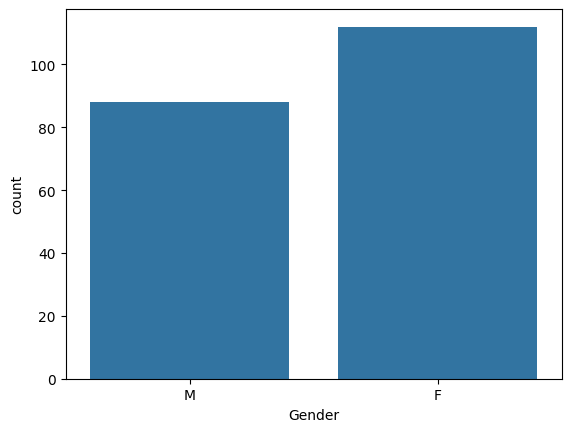

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender', data=df)
plt.show()


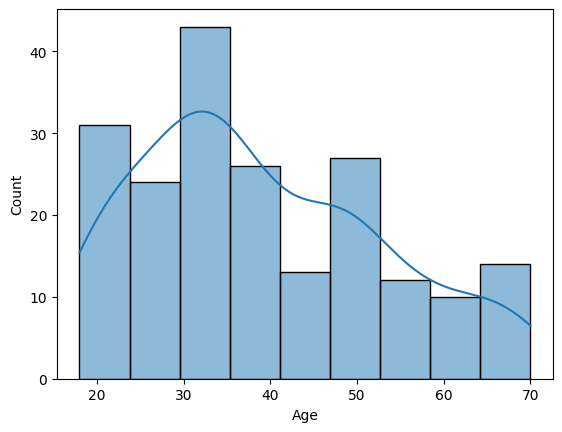

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.show()


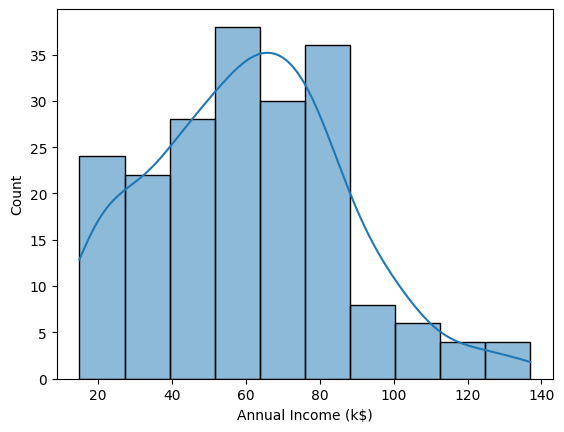

In [ ]:
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.show()


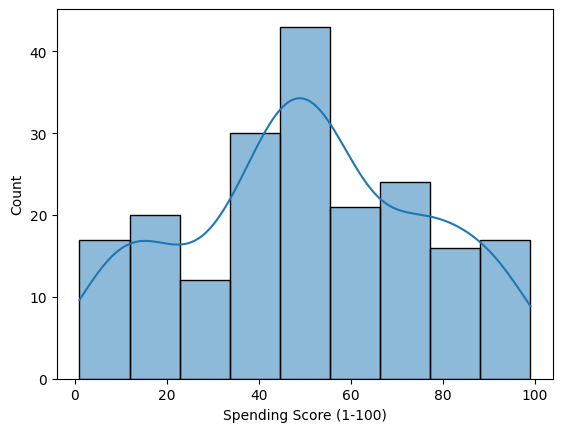

In [ ]:
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.show()


In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



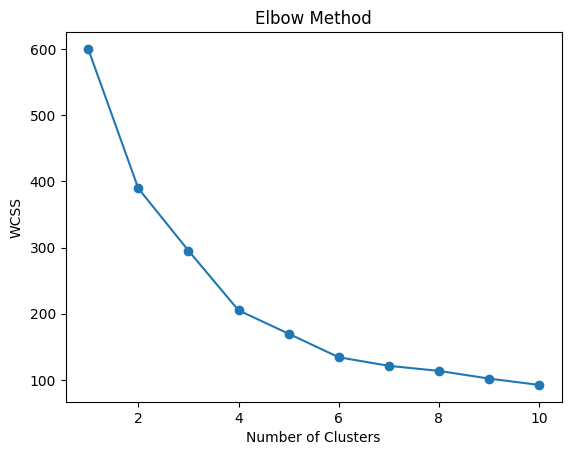

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100),Cluster
0,1,M,19,High School,Married,15,39,2
1,2,M,21,Graduate,Single,15,81,2
2,3,F,20,Graduate,Married,16,6,3
3,4,F,23,High School,Unknown,16,77,2
4,5,F,31,Uneducated,Married,17,40,2


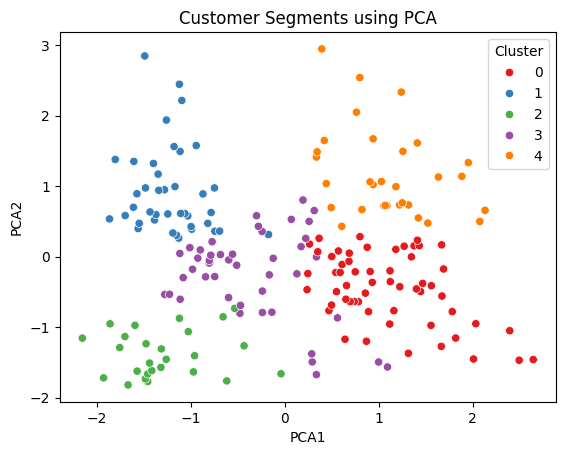

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=df
)
plt.title('Customer Segments using PCA')
plt.show()


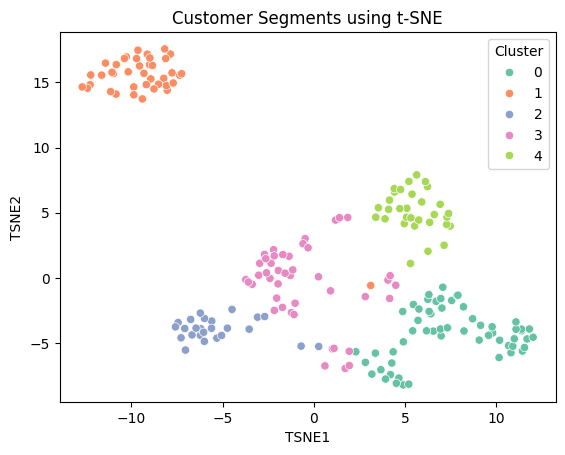

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(X_scaled)

df['TSNE1'] = tsne_data[:, 0]
df['TSNE2'] = tsne_data[:, 1]
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette='Set2',
    data=df
)
plt.title('Customer Segments using t-SNE')
plt.show()


In [ ]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871
